In [1]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
import nltk

In [3]:
df = pd.read_csv('../../Documents/csv/Tweets.csv')

In [4]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
df.shape

(14640, 15)

# for sentiment analysis we will take text & sentiment column 

In [6]:
df = df[['airline_sentiment','text']]

In [7]:
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [8]:
df.shape

(14640, 2)

In [9]:
df.isnull().sum()

airline_sentiment    0
text                 0
dtype: int64

In [10]:
df['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

<AxesSubplot:>

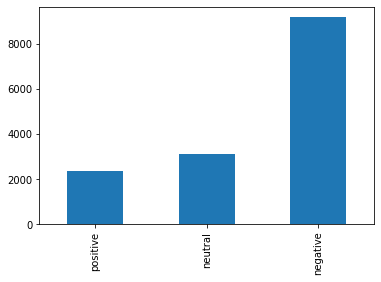

In [11]:
df['airline_sentiment'].value_counts().sort_values().plot(kind = 'bar')

In [12]:
X = df['text']
y = df['airline_sentiment']

In [13]:
X

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object

In [14]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [15]:
# libraries for cleaning the data

from nltk.corpus import stopwords
nltk.download('stopwords')
import re
nltk.download('wordnet')
import string
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:
stop_word = stopwords.words('English')

In [17]:
stop_word

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [18]:
punctuation = string.punctuation

In [19]:
clean_text = []

for i in range(len(X)):
    text = re.sub('[^a-zA-Z]', ' ',X.iloc[i])
    text = text.lower().split()
    text = [lemmatizer.lemmatize(word) for word in text if (word not in stop_word) and (word not in punctuation)]
    text = ' '.join(text)
    clean_text.append(text)

In [20]:
clean_text

['virginamerica dhepburn said',
 'virginamerica plus added commercial experience tacky',
 'virginamerica today must mean need take another trip',
 'virginamerica really aggressive blast obnoxious entertainment guest face amp little recourse',
 'virginamerica really big bad thing',
 'virginamerica seriously would pay flight seat playing really bad thing flying va',
 'virginamerica yes nearly every time fly vx ear worm go away',
 'virginamerica really missed prime opportunity men without hat parody http co mwpg grezp',
 'virginamerica well',
 'virginamerica amazing arrived hour early good',
 'virginamerica know suicide second leading cause death among teen',
 'virginamerica lt pretty graphic much better minimal iconography',
 'virginamerica great deal already thinking nd trip australia amp even gone st trip yet p',
 'virginamerica virginmedia flying fabulous seductive sky u take stress away travel http co ahlxhhkiyn',
 'virginamerica thanks',
 'virginamerica sfo pdx schedule still mia',


In [21]:
y

0         neutral
1        positive
2         neutral
3        negative
4        negative
           ...   
14635    positive
14636    negative
14637     neutral
14638    negative
14639     neutral
Name: airline_sentiment, Length: 14640, dtype: object

In [22]:
from sklearn import preprocessing
label_encoding = preprocessing.LabelEncoder()
y = label_encoding.fit_transform(y)

In [23]:
y

array([1, 2, 1, ..., 1, 0, 1])

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(max_features = 5000, stop_words = ['virginamerica','united'])
X_fit = count_vectorizer.fit_transform(clean_text).toarray()
X_fit.shape

(14640, 5000)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_fit,y, test_size = 0.25)

In [26]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [27]:
print(model.score(X_test,y_test))

0.7598360655737705


In [28]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 0, 2])

In [29]:
from sklearn.metrics import classification_report
classification = classification_report(y_test,y_pred)
print(classification)

              precision    recall  f1-score   support

           0       0.81      0.88      0.85      2286
           1       0.62      0.46      0.53       786
           2       0.67      0.68      0.67       588

    accuracy                           0.76      3660
   macro avg       0.70      0.67      0.68      3660
weighted avg       0.75      0.76      0.75      3660



In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
conf_matrix = confusion_matrix(y_test,y_pred)

In [32]:
conf_matrix

array([[2020,  165,  101],
       [ 331,  364,   91],
       [ 129,   62,  397]], dtype=int64)

<AxesSubplot:>

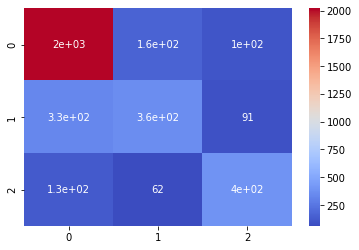

In [33]:
sns.heatmap(conf_matrix, annot=True,cmap='coolwarm')

#LogisticRegression

In [34]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(max_iter=400)
LR.fit(X_train,y_train)

LogisticRegression(max_iter=400)

In [35]:
print(LR.score(X_test,y_test))

0.7800546448087432


In [40]:
y_p = LR.predict(X_test)
y_p

array([1, 0, 0, ..., 0, 0, 1])

In [41]:
from sklearn.metrics import classification_report
classification = classification_report(y_test,y_p)
print(classification)

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      2286
           1       0.61      0.57      0.59       786
           2       0.72      0.68      0.70       588

    accuracy                           0.78      3660
   macro avg       0.73      0.71      0.72      3660
weighted avg       0.78      0.78      0.78      3660



In [36]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [37]:
print(dt.score(X_test,y_test))

0.6901639344262295


In [38]:
from sklearn.linear_model import SGDClassifier
sd = SGDClassifier()
sd.fit(X_train,y_train)

SGDClassifier()

In [39]:
print(sd.score(X_test,y_test))

0.7743169398907104
